Customer 1 vs 2

Plain Contract

Ordering Contract

OC,5BLOCKS,500,MC,ST=0

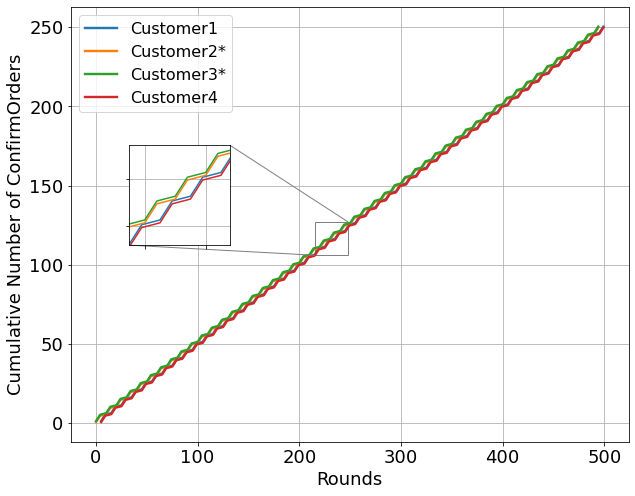

In [3]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,5BLOCKS,500,MC,ST=0/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_customer1 = []
rounds_customer2 = []
rounds_customer3 = []
rounds_customer4 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        round_number = entry['round']  # Use the round information

        if receiver == "customer1":
            rounds_customer1.append(round_number)
        elif receiver == "customer2":
            rounds_customer2.append(round_number)
        elif receiver == "customer3":
            rounds_customer3.append(round_number)
        elif receiver == "customer4":
            rounds_customer4.append(round_number)

# Sort rounds
rounds_customer1.sort()
rounds_customer2.sort()
rounds_customer3.sort()
rounds_customer4.sort()

# Create line data for the plot
x_customer1 = sorted(set(rounds_customer1))
y_customer1 = [rounds_customer1.count(r) for r in x_customer1]

x_customer2 = sorted(set(rounds_customer2))
y_customer2 = [rounds_customer2.count(r) for r in x_customer2]

x_customer3 = sorted(set(rounds_customer3))
y_customer3 = [rounds_customer3.count(r) for r in x_customer3]

x_customer4 = sorted(set(rounds_customer4))
y_customer4 = [rounds_customer4.count(r) for r in x_customer4]

# Accumulate counts to show the cumulative count of ConfirmOrders
cumulative_y_customer1 = []
cumulative_y_customer2 = []
cumulative_y_customer3 = []
cumulative_y_customer4 = []

cumsum1 = 0
cumsum2 = 0
cumsum3 = 0
cumsum4 = 0

for y in y_customer1:
    cumsum1 += y
    cumulative_y_customer1.append(cumsum1)

for y in y_customer2:
    cumsum2 += y
    cumulative_y_customer2.append(cumsum2)

for y in y_customer3:
    cumsum3 += y
    cumulative_y_customer3.append(cumsum3)

for y in y_customer4:
    cumsum4 += y
    cumulative_y_customer4.append(cumsum4)

# Adjusting cumulative values for better visibility
cumulative_y_customer1 = [y + 0.3 for y in cumulative_y_customer1]
cumulative_y_customer2 = [y - 0.3 for y in cumulative_y_customer2]
cumulative_y_customer3 = [y + 0.3 for y in cumulative_y_customer3]
cumulative_y_customer4 = [y - 0.3 for y in cumulative_y_customer4]

# Plot the data with a zoomed-in view
plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_customer1, cumulative_y_customer1, label="Customer1", linestyle='-', linewidth=2.4)
ax.plot(x_customer2, cumulative_y_customer2, label="Customer2*", linestyle='-', linewidth=2.4)
ax.plot(x_customer3, cumulative_y_customer3, label="Customer3*", linestyle='-', linewidth=2.4)
ax.plot(x_customer4, cumulative_y_customer4, label="Customer4", linestyle='-', linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of ConfirmOrders")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_customer1, cumulative_y_customer1, linestyle='-', linewidth=1.5)
axins.plot(x_customer2, cumulative_y_customer2, linestyle='-', linewidth=1.5)
axins.plot(x_customer3, cumulative_y_customer3, linestyle='-', linewidth=1.5)
axins.plot(x_customer4, cumulative_y_customer4, linestyle='-', linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_purchases_ST0_5BLOCKS.pdf", dpi=500)  # High resolution

# Display the plot
plt.show()


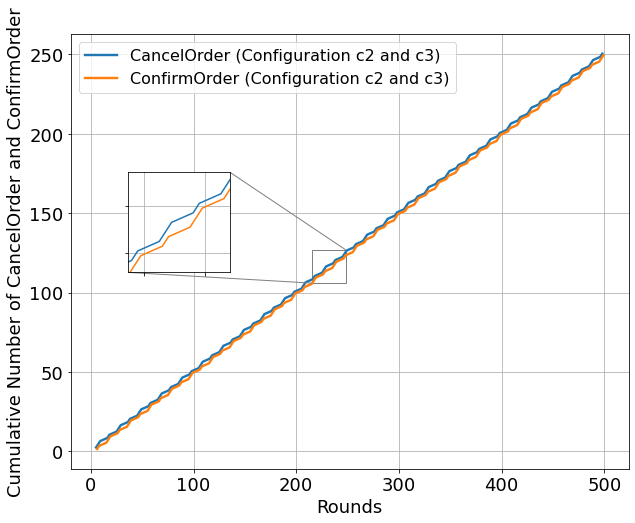

In [62]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,5BLOCKS,500,MC,ST=0/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_cancelorder = []
rounds_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']  # Use the round information

        if instance_id in ["2", "3"]:
            if entry['data']['taskName'] == "CancelOrder":
                rounds_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_confirmorder.append(round_number)

# Sort rounds
rounds_cancelorder.sort()
rounds_confirmorder.sort()

# Create line data for the plot
x_cancelorder = sorted(set(rounds_cancelorder))
y_cancelorder = [rounds_cancelorder.count(r) for r in x_cancelorder]

x_confirmorder = sorted(set(rounds_confirmorder))
y_confirmorder = [rounds_confirmorder.count(r) for r in x_confirmorder]

# Accumulate counts to show the cumulative count of CancelOrder and ConfirmOrder
cumulative_y_cancelorder = []
cumulative_y_confirmorder = []

cumsum_cancel = 0
cumsum_confirm = 0

for y in y_cancelorder:
    cumsum_cancel += y
    cumulative_y_cancelorder.append(cumsum_cancel)

for y in y_confirmorder:
    cumsum_confirm += y
    cumulative_y_confirmorder.append(cumsum_confirm)


cumulative_y_cancelorder = [y + 0.5 for y in cumulative_y_cancelorder]
cumulative_y_confirmorder = [y - 0.5 for y in cumulative_y_confirmorder]

plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size



# Plot the data with zooming feature
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_cancelorder, cumulative_y_cancelorder, label="CancelOrder (Configuration c2 and c3)", linewidth=2.4)
ax.plot(x_confirmorder, cumulative_y_confirmorder, label="ConfirmOrder (Configuration c2 and c3)",  linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of CancelOrder and ConfirmOrder")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_cancelorder, cumulative_y_cancelorder, linewidth=1.5)
axins.plot(x_confirmorder, cumulative_y_confirmorder, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_cancel_confirm_ST0_5BLOCKS.pdf")

# Display the plot
plt.show()


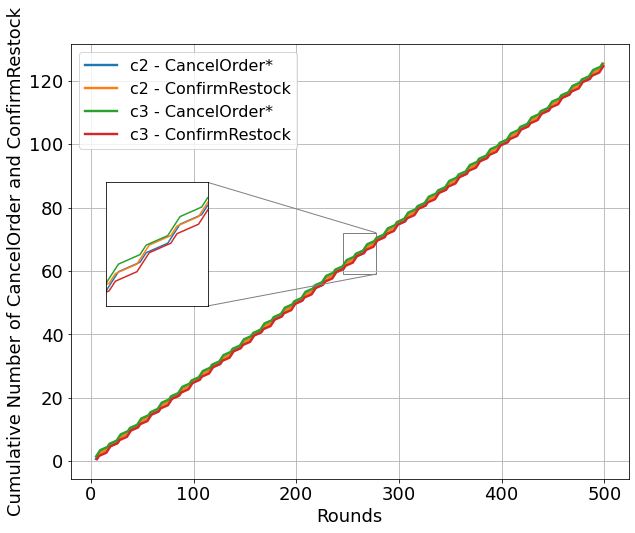

In [6]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,5BLOCKS,500,MC,ST=0/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_c2_cancelorder = []
rounds_c2_confirmorder = []
rounds_c3_cancelorder = []
rounds_c3_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']

        if instance_id == "2":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c2_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c2_confirmorder.append(round_number)
        elif instance_id == "3":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c3_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c3_confirmorder.append(round_number)

# Sort rounds
rounds_c2_cancelorder.sort()
rounds_c2_confirmorder.sort()
rounds_c3_cancelorder.sort()
rounds_c3_confirmorder.sort()

# Function to generate cumulative data
def generate_cumulative_data(rounds):
    x = sorted(set(rounds))
    y = [rounds.count(r) for r in x]
    cumulative_y = []
    cumsum = 0
    for val in y:
        cumsum += val
        cumulative_y.append(cumsum)
    return x, cumulative_y

# Generate cumulative data
x_c2_cancelorder, cumulative_y_c2_cancelorder = generate_cumulative_data(rounds_c2_cancelorder)
x_c2_confirmorder, cumulative_y_c2_confirmorder = generate_cumulative_data(rounds_c2_confirmorder)
x_c3_cancelorder, cumulative_y_c3_cancelorder = generate_cumulative_data(rounds_c3_cancelorder)
x_c3_confirmorder, cumulative_y_c3_confirmorder = generate_cumulative_data(rounds_c3_confirmorder)

# Apply specific adjustments to cumulative data
cumulative_y_c2_cancelorder = [y - 0.4 for y in cumulative_y_c2_cancelorder]
cumulative_y_c2_confirmorder = [y + 0.4 for y in cumulative_y_c2_confirmorder]
cumulative_y_c3_cancelorder = [y + 0.4 for y in cumulative_y_c3_cancelorder]
cumulative_y_c3_confirmorder = [y - 0.4 for y in cumulative_y_c3_confirmorder]

# Create the main plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_c2_cancelorder, cumulative_y_c2_cancelorder, label="c2 - CancelOrder*", linewidth=2.4)
ax.plot(x_c2_confirmorder, cumulative_y_c2_confirmorder, label="c2 - ConfirmRestock", linewidth=2.4)
ax.plot(x_c3_cancelorder, cumulative_y_c3_cancelorder, label="c3 - CancelOrder*", linewidth=2.4)
ax.plot(x_c3_confirmorder, cumulative_y_c3_confirmorder, label="c3 - ConfirmRestock", linewidth=2.4)

# Add labels, legend, and grid
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of CancelOrder and ConfirmRestock")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.26, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_c2_cancelorder, cumulative_y_c2_cancelorder, linewidth=1.5)
axins.plot(x_c2_confirmorder, cumulative_y_c2_confirmorder, linewidth=1.5)
axins.plot(x_c3_cancelorder, cumulative_y_c3_cancelorder, linewidth=1.5)
axins.plot(x_c3_confirmorder, cumulative_y_c3_confirmorder, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 245, 278  # Adjust these limits based on the rounds of interest
y1, y2 = 59, 72  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid()
axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_cancel_confirm_ST0_5BLOCKS.pdf")
plt.show()


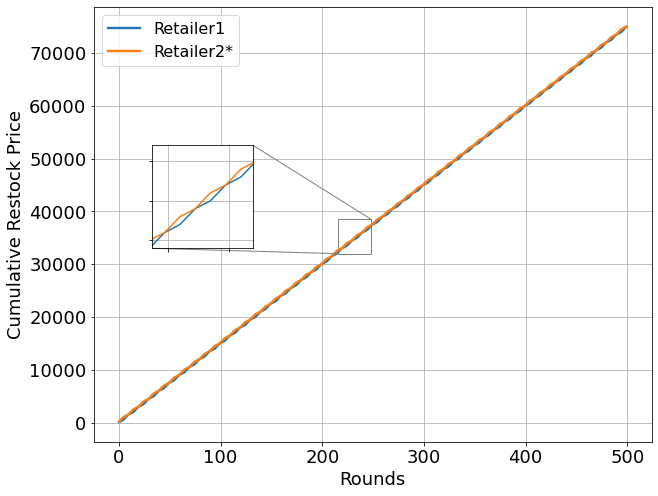

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load data from log.json
with open("/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,5BLOCKS,500,MC,ST=0/logs.json", "r") as file:
    logs = json.load(file)

# Extract relevant data
new_price_data = []
for entry in logs:
    if entry["event"] == "NewPrice":
        instance_id = entry["data"]["instanceID"]
        new_price = int(entry["data"]["newPrice"])
        round_number = entry["round"]  # Use the round number instead of timestamp
        new_price_data.append({"InstanceID": instance_id, "NewPrice": new_price, "Round": round_number})

# Convert to a DataFrame
df = pd.DataFrame(new_price_data)

# Combine instances 1 and 3, and 2 and 4
df["CombinedInstanceID"] = df["InstanceID"].replace({"1": "Retailer1", "2": "Retailer1", "3": "Retailer2*", "4": "Retailer2*"})

# Sort data by round
df.sort_values("Round", inplace=True)

# Accumulate NewPrice over time for each combined group
df["CumulativePrice"] = df.groupby("CombinedInstanceID")["NewPrice"].transform(pd.Series.cumsum)

# Add y-axis adjustments
adjustments = {"Retailer1": 0.4, "Retailer2*": -0.4}
df["AdjustedCumulativePrice"] = df["CumulativePrice"] + df["CombinedInstanceID"].map(adjustments)

plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size


# Plot the data with zooming feature
fig, ax = plt.subplots(figsize=(10, 8))
for combined_id, group in df.groupby("CombinedInstanceID"):
    ax.plot(group["Round"].values, group["AdjustedCumulativePrice"].values, label=f"{combined_id}", linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Restock Price")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
for combined_id, group in df.groupby("CombinedInstanceID"):
    axins.plot(group["Round"].values, group["AdjustedCumulativePrice"].values, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
y1, y2 = 32000, 38500  # Adjust these limits based on the cumulative counts of interest

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

plt.savefig("accumulated_price_ST0_5BLOCKS.pdf")

# Display the plot
plt.show()



PLAIN,500,MC

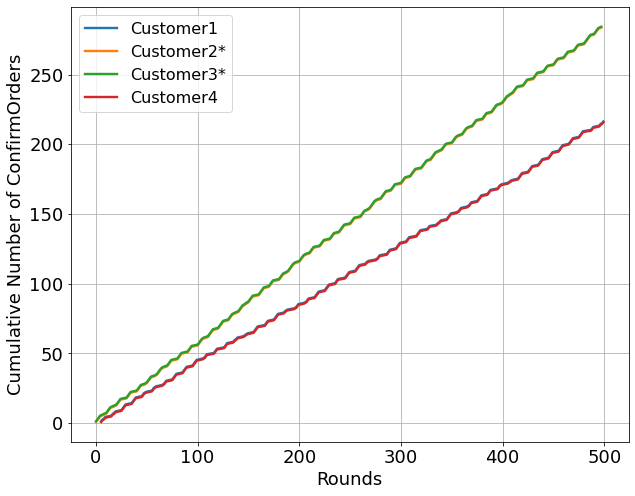

In [130]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2BLOCKS,500,MC,ST=2/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_customer1 = []
rounds_customer2 = []
rounds_customer3 = []
rounds_customer4 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        round_number = entry['round']  # Use the round information

        if receiver == "customer1":
            rounds_customer1.append(round_number)
        elif receiver == "customer2":
            rounds_customer2.append(round_number)
        elif receiver == "customer3":
            rounds_customer3.append(round_number)
        elif receiver == "customer4":
            rounds_customer4.append(round_number)

# Sort rounds
rounds_customer1.sort()
rounds_customer2.sort()
rounds_customer3.sort()
rounds_customer4.sort()

# Create line data for the plot
x_customer1 = sorted(set(rounds_customer1))
y_customer1 = [rounds_customer1.count(r) for r in x_customer1]

x_customer2 = sorted(set(rounds_customer2))
y_customer2 = [rounds_customer2.count(r) for r in x_customer2]

x_customer3 = sorted(set(rounds_customer3))
y_customer3 = [rounds_customer3.count(r) for r in x_customer3]

x_customer4 = sorted(set(rounds_customer4))
y_customer4 = [rounds_customer4.count(r) for r in x_customer4]

# Accumulate counts to show the cumulative count of ConfirmOrders
cumulative_y_customer1 = []
cumulative_y_customer2 = []
cumulative_y_customer3 = []
cumulative_y_customer4 = []

cumsum1 = 0
cumsum2 = 0
cumsum3 = 0
cumsum4 = 0

for y in y_customer1:
    cumsum1 += y
    cumulative_y_customer1.append(cumsum1)

for y in y_customer2:
    cumsum2 += y
    cumulative_y_customer2.append(cumsum2)

for y in y_customer3:
    cumsum3 += y
    cumulative_y_customer3.append(cumsum3)

for y in y_customer4:
    cumsum4 += y
    cumulative_y_customer4.append(cumsum4)

# Adjusting cumulative values for better visibility
cumulative_y_customer1 = [y + 0.3 for y in cumulative_y_customer1]
cumulative_y_customer2 = [y - 0.3 for y in cumulative_y_customer2]
cumulative_y_customer3 = [y + 0.3 for y in cumulative_y_customer3]
cumulative_y_customer4 = [y - 0.3 for y in cumulative_y_customer4]

# Plot the data with a zoomed-in view
plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_customer1, cumulative_y_customer1, label="Customer1", linestyle='-', linewidth=2.4)
ax.plot(x_customer2, cumulative_y_customer2, label="Customer2*", linestyle='-', linewidth=2.4)
ax.plot(x_customer3, cumulative_y_customer3, label="Customer3*", linestyle='-', linewidth=2.4)
ax.plot(x_customer4, cumulative_y_customer4, label="Customer4", linestyle='-', linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of ConfirmOrders")
ax.legend()
ax.grid()

# Zoomed-in inset
# axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
# axins.plot(x_customer1, cumulative_y_customer1, linestyle='-', linewidth=1.5)
# axins.plot(x_customer2, cumulative_y_customer2, linestyle='-', linewidth=1.5)
# axins.plot(x_customer3, cumulative_y_customer3, linestyle='-', linewidth=1.5)
# axins.plot(x_customer4, cumulative_y_customer4, linestyle='-', linewidth=1.5)

# Define the zoomed-in area
# x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
# y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
# plt.xticks(visible=False)
# plt.yticks(visible=False)

# Mark the inset area on the main plot
# mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_purchases_PLAIN_5BLOCKS.pdf", dpi=500)  # High resolution

# Display the plot
plt.show()


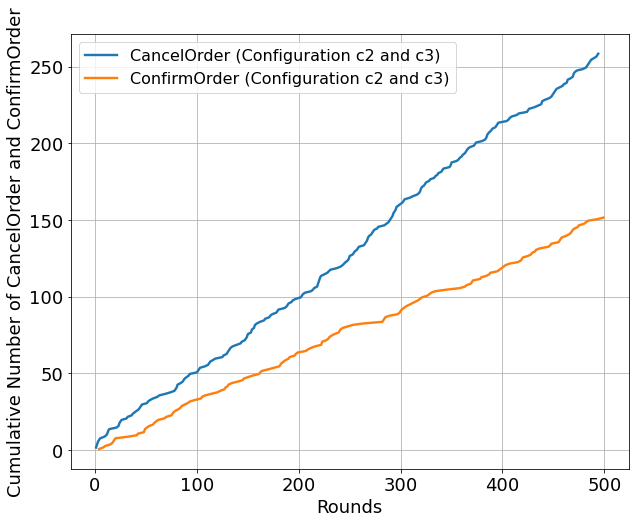

In [86]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/PLAIN,5BLOCKS,500,MC/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_cancelorder = []
rounds_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']  # Use the round information

        if instance_id in ["2", "3"]:
            if entry['data']['taskName'] == "CancelOrder":
                rounds_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_confirmorder.append(round_number)

# Sort rounds
rounds_cancelorder.sort()
rounds_confirmorder.sort()

# Create line data for the plot
x_cancelorder = sorted(set(rounds_cancelorder))
y_cancelorder = [rounds_cancelorder.count(r) for r in x_cancelorder]

x_confirmorder = sorted(set(rounds_confirmorder))
y_confirmorder = [rounds_confirmorder.count(r) for r in x_confirmorder]

# Accumulate counts to show the cumulative count of CancelOrder and ConfirmOrder
cumulative_y_cancelorder = []
cumulative_y_confirmorder = []

cumsum_cancel = 0
cumsum_confirm = 0

for y in y_cancelorder:
    cumsum_cancel += y
    cumulative_y_cancelorder.append(cumsum_cancel)

for y in y_confirmorder:
    cumsum_confirm += y
    cumulative_y_confirmorder.append(cumsum_confirm)


cumulative_y_cancelorder = [y + 0.5 for y in cumulative_y_cancelorder]
cumulative_y_confirmorder = [y - 0.5 for y in cumulative_y_confirmorder]

plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size



# Plot the data with zooming feature
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_cancelorder, cumulative_y_cancelorder, label="CancelOrder (Configuration c2 and c3)", linewidth=2.4)
ax.plot(x_confirmorder, cumulative_y_confirmorder, label="ConfirmOrder (Configuration c2 and c3)",  linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of CancelOrder and ConfirmOrder")
ax.legend()
ax.grid()

# Zoomed-in inset
# axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
# axins.plot(x_cancelorder, cumulative_y_cancelorder, linewidth=1.5)
# axins.plot(x_confirmorder, cumulative_y_confirmorder, linewidth=1.5)

# Define the zoomed-in area
# x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
# y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
# axins.grid()
# plt.xticks(visible=False)
# plt.yticks(visible=False)

# Mark the inset area on the main plot
# mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_cancel_confirm_PLAIN_5BLOCKS.pdf")

# Display the plot
plt.show()


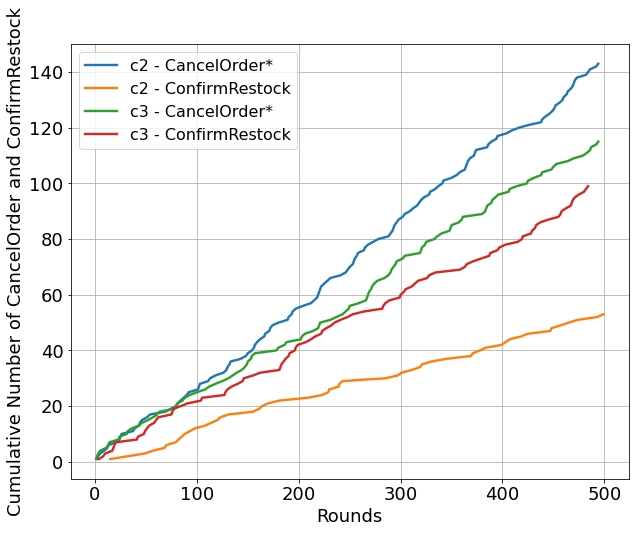

In [54]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/PLAIN,5BLOCKS,500,MC/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_c2_cancelorder = []
rounds_c2_confirmorder = []
rounds_c3_cancelorder = []
rounds_c3_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']

        if instance_id == "2":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c2_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c2_confirmorder.append(round_number)
        elif instance_id == "3":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c3_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c3_confirmorder.append(round_number)

# Sort rounds
rounds_c2_cancelorder.sort()
rounds_c2_confirmorder.sort()
rounds_c3_cancelorder.sort()
rounds_c3_confirmorder.sort()

# Function to generate cumulative data
def generate_cumulative_data(rounds):
    x = sorted(set(rounds))
    y = [rounds.count(r) for r in x]
    cumulative_y = []
    cumsum = 0
    for val in y:
        cumsum += val
        cumulative_y.append(cumsum)
    return x, cumulative_y

# Generate cumulative data
x_c2_cancelorder, cumulative_y_c2_cancelorder = generate_cumulative_data(rounds_c2_cancelorder)
x_c2_confirmorder, cumulative_y_c2_confirmorder = generate_cumulative_data(rounds_c2_confirmorder)
x_c3_cancelorder, cumulative_y_c3_cancelorder = generate_cumulative_data(rounds_c3_cancelorder)
x_c3_confirmorder, cumulative_y_c3_confirmorder = generate_cumulative_data(rounds_c3_confirmorder)

# Plot all data on the same plot
plt.figure(figsize=(10, 8))
plt.plot(x_c2_cancelorder, cumulative_y_c2_cancelorder, label="c2 - CancelOrder*", linewidth=2.4)
plt.plot(x_c2_confirmorder, cumulative_y_c2_confirmorder, label="c2 - ConfirmRestock", linewidth=2.4)
plt.plot(x_c3_cancelorder, cumulative_y_c3_cancelorder, label="c3 - CancelOrder*", linewidth=2.4)
plt.plot(x_c3_confirmorder, cumulative_y_c3_confirmorder, label="c3 - ConfirmRestock", linewidth=2.4)

# Add labels, legend, and grid
plt.xlabel("Rounds")
plt.ylabel("Cumulative Number of CancelOrder and ConfirmRestock")
plt.legend()
plt.grid()

# Zoomed-in inset
# axins = zoomed_inset_axes(plt.gca(), zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=plt.gca().transAxes)
# axins.plot(x_c2_cancelorder, cumulative_y_c2_cancelorder, linewidth=1.5)
# axins.plot(x_c2_confirmorder, cumulative_y_c2_confirmorder, linewidth=1.5)
# axins.plot(x_c3_cancelorder, cumulative_y_c3_cancelorder, linewidth=1.5)
# axins.plot(x_c3_confirmorder, cumulative_y_c3_confirmorder, linewidth=1.5)

# Define the zoomed-in area
# x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
# y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# axins.grid()
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# mark_inset(plt.gca(), axins, loc1=3, loc2=1, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_cancel_confirm_PLAIN_5BLOCKS.pdf")
plt.show()

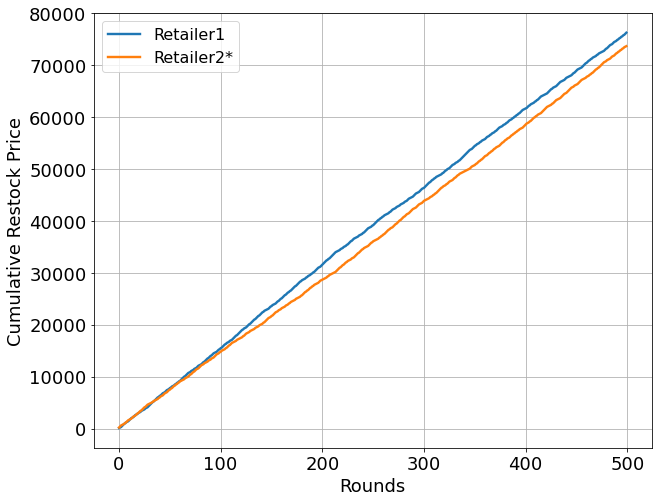

In [48]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load data from log.json
with open("/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/PLAIN,5BLOCKS,500,MC/logs.json", "r") as file:
    logs = json.load(file)

# Extract relevant data
new_price_data = []
for entry in logs:
    if entry["event"] == "NewPrice":
        instance_id = entry["data"]["instanceID"]
        new_price = int(entry["data"]["newPrice"])
        round_number = entry["round"]  # Use the round number instead of timestamp
        new_price_data.append({"InstanceID": instance_id, "NewPrice": new_price, "Round": round_number})

# Convert to a DataFrame
df = pd.DataFrame(new_price_data)

# Combine instances 1 and 3, and 2 and 4
df["CombinedInstanceID"] = df["InstanceID"].replace({"1": "Retailer1", "2": "Retailer1", "3": "Retailer2*", "4": "Retailer2*"})

# Sort data by round
df.sort_values("Round", inplace=True)

# Accumulate NewPrice over time for each combined group
df["CumulativePrice"] = df.groupby("CombinedInstanceID")["NewPrice"].transform(pd.Series.cumsum)

# Add y-axis adjustments
adjustments = {"Retailer1": 0.4, "Retailer2*": -0.4}
df["AdjustedCumulativePrice"] = df["CumulativePrice"] + df["CombinedInstanceID"].map(adjustments)

plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size


# Plot the data with zooming feature
fig, ax = plt.subplots(figsize=(10, 8))
for combined_id, group in df.groupby("CombinedInstanceID"):
    ax.plot(group["Round"].values, group["AdjustedCumulativePrice"].values, label=f"{combined_id}", linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Restock Price")
ax.legend()
ax.grid()

# Zoomed-in inset
# axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
# for combined_id, group in df.groupby("CombinedInstanceID"):
#     axins.plot(group["Round"].values, group["AdjustedCumulativePrice"].values, linewidth=1.5)

# Define the zoomed-in area
# x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
# y1, y2 = 32000, 38500  # Adjust these limits based on the cumulative counts of interest

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
# axins.grid()
# plt.xticks(visible=False)
# plt.yticks(visible=False)

# Mark the inset area on the main plot
# mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

plt.savefig("accumulated_price_PLAIN_5BLOCKS.pdf")

# Display the plot
plt.show()



OC,2Blocks,500,MC,ST=0

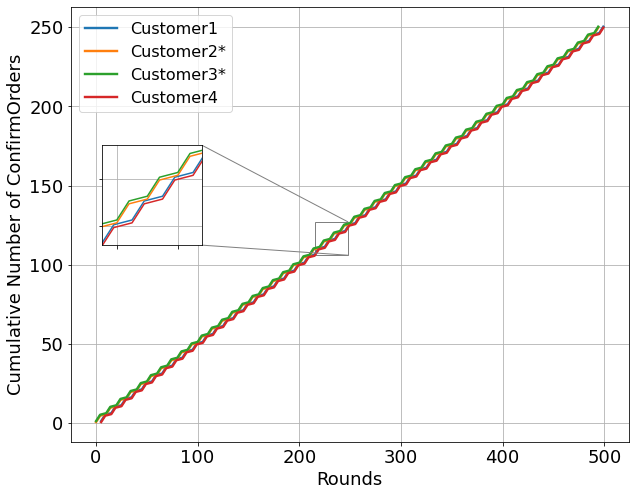

In [47]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2BLOCKS,500.MC.ST=0(NEW)/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_customer1 = []
rounds_customer2 = []
rounds_customer3 = []
rounds_customer4 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        round_number = entry['round']  # Use the round information

        if receiver == "customer1":
            rounds_customer1.append(round_number)
        elif receiver == "customer2":
            rounds_customer2.append(round_number)
        elif receiver == "customer3":
            rounds_customer3.append(round_number)
        elif receiver == "customer4":
            rounds_customer4.append(round_number)

# Sort rounds
rounds_customer1.sort()
rounds_customer2.sort()
rounds_customer3.sort()
rounds_customer4.sort()

# Create line data for the plot
x_customer1 = sorted(set(rounds_customer1))
y_customer1 = [rounds_customer1.count(r) for r in x_customer1]

x_customer2 = sorted(set(rounds_customer2))
y_customer2 = [rounds_customer2.count(r) for r in x_customer2]

x_customer3 = sorted(set(rounds_customer3))
y_customer3 = [rounds_customer3.count(r) for r in x_customer3]

x_customer4 = sorted(set(rounds_customer4))
y_customer4 = [rounds_customer4.count(r) for r in x_customer4]

# Accumulate counts to show the cumulative count of ConfirmOrders
cumulative_y_customer1 = []
cumulative_y_customer2 = []
cumulative_y_customer3 = []
cumulative_y_customer4 = []

cumsum1 = 0
cumsum2 = 0
cumsum3 = 0
cumsum4 = 0

for y in y_customer1:
    cumsum1 += y
    cumulative_y_customer1.append(cumsum1)

for y in y_customer2:
    cumsum2 += y
    cumulative_y_customer2.append(cumsum2)

for y in y_customer3:
    cumsum3 += y
    cumulative_y_customer3.append(cumsum3)

for y in y_customer4:
    cumsum4 += y
    cumulative_y_customer4.append(cumsum4)

# Adjusting cumulative values for better visibility
cumulative_y_customer1 = [y + 0.3 for y in cumulative_y_customer1]
cumulative_y_customer2 = [y - 0.3 for y in cumulative_y_customer2]
cumulative_y_customer3 = [y + 0.3 for y in cumulative_y_customer3]
cumulative_y_customer4 = [y - 0.3 for y in cumulative_y_customer4]

# Plot the data with a zoomed-in view
plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_customer1, cumulative_y_customer1, label="Customer1", linestyle='-', linewidth=2.4)
ax.plot(x_customer2, cumulative_y_customer2, label="Customer2*", linestyle='-', linewidth=2.4)
ax.plot(x_customer3, cumulative_y_customer3, label="Customer3*", linestyle='-', linewidth=2.4)
ax.plot(x_customer4, cumulative_y_customer4, label="Customer4", linestyle='-', linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of ConfirmOrders")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.25, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_customer1, cumulative_y_customer1, linestyle='-', linewidth=1.5)
axins.plot(x_customer2, cumulative_y_customer2, linestyle='-', linewidth=1.5)
axins.plot(x_customer3, cumulative_y_customer3, linestyle='-', linewidth=1.5)
axins.plot(x_customer4, cumulative_y_customer4, linestyle='-', linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_purchases_OC_2BLOCKS.pdf", dpi=500)  # High resolution

# Display the plot
plt.show()


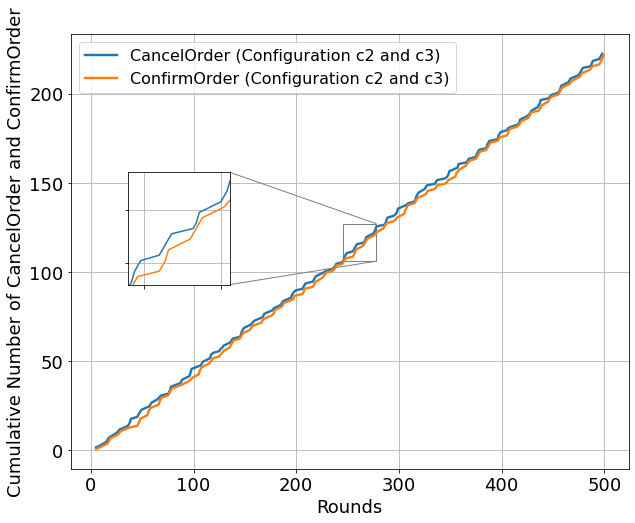

In [59]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2Blocks,500,MC,ST=0/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_cancelorder = []
rounds_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']  # Use the round information

        if instance_id in ["2","3"]:
            if entry['data']['taskName'] == "CancelOrder":
                rounds_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_confirmorder.append(round_number)

# Sort rounds
rounds_cancelorder.sort()
rounds_confirmorder.sort()

# Create line data for the plot
x_cancelorder = sorted(set(rounds_cancelorder))
y_cancelorder = [rounds_cancelorder.count(r) for r in x_cancelorder]

x_confirmorder = sorted(set(rounds_confirmorder))
y_confirmorder = [rounds_confirmorder.count(r) for r in x_confirmorder]

# Accumulate counts to show the cumulative count of CancelOrder and ConfirmOrder
cumulative_y_cancelorder = []
cumulative_y_confirmorder = []

cumsum_cancel = 0
cumsum_confirm = 0

for y in y_cancelorder:
    cumsum_cancel += y
    cumulative_y_cancelorder.append(cumsum_cancel)

for y in y_confirmorder:
    cumsum_confirm += y
    cumulative_y_confirmorder.append(cumsum_confirm)


cumulative_y_cancelorder = [y + 0.5 for y in cumulative_y_cancelorder]
cumulative_y_confirmorder = [y - 0.5 for y in cumulative_y_confirmorder]

plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size



# Plot the data with zooming feature
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_cancelorder, cumulative_y_cancelorder, label="CancelOrder (Configuration c2 and c3)", linewidth=2.4)
ax.plot(x_confirmorder, cumulative_y_confirmorder, label="ConfirmOrder (Configuration c2 and c3)",  linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of CancelOrder and ConfirmOrder")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_cancelorder, cumulative_y_cancelorder, linewidth=1.5)
axins.plot(x_confirmorder, cumulative_y_confirmorder, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 245, 278  # Adjust these limits based on the rounds of interest
y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_cancel_confirm_OC_2BLOCKS.pdf")

# Display the plot
plt.show()

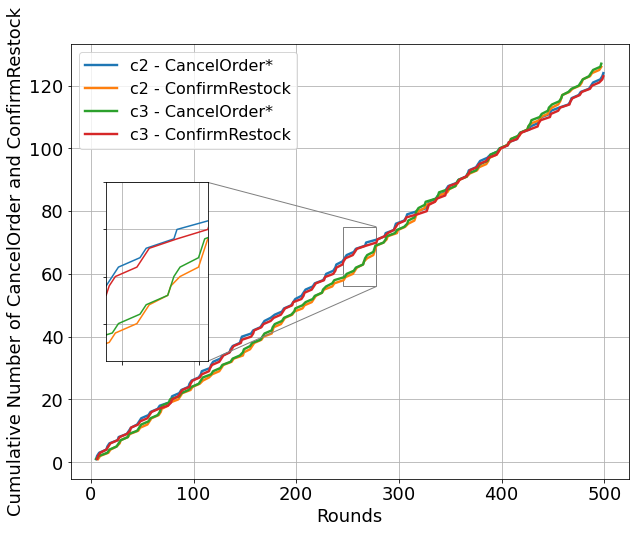

In [55]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2BLOCKS,500.MC.ST=0(NEW)/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_c2_cancelorder = []
rounds_c2_confirmorder = []
rounds_c3_cancelorder = []
rounds_c3_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']

        if instance_id == "2":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c2_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c2_confirmorder.append(round_number)
        elif instance_id == "3":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c3_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c3_confirmorder.append(round_number)

# Sort rounds
rounds_c2_cancelorder.sort()
rounds_c2_confirmorder.sort()
rounds_c3_cancelorder.sort()
rounds_c3_confirmorder.sort()

# Function to generate cumulative data
def generate_cumulative_data(rounds):
    x = sorted(set(rounds))
    y = [rounds.count(r) for r in x]
    cumulative_y = []
    cumsum = 0
    for val in y:
        cumsum += val
        cumulative_y.append(cumsum)
    return x, cumulative_y

# Generate cumulative data
x_c2_cancelorder, cumulative_y_c2_cancelorder = generate_cumulative_data(rounds_c2_cancelorder)
x_c2_confirmorder, cumulative_y_c2_confirmorder = generate_cumulative_data(rounds_c2_confirmorder)
x_c3_cancelorder, cumulative_y_c3_cancelorder = generate_cumulative_data(rounds_c3_cancelorder)
x_c3_confirmorder, cumulative_y_c3_confirmorder = generate_cumulative_data(rounds_c3_confirmorder)

# Create the main plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_c2_cancelorder, cumulative_y_c2_cancelorder, label="c2 - CancelOrder*", linewidth=2.4)
ax.plot(x_c2_confirmorder, cumulative_y_c2_confirmorder, label="c2 - ConfirmRestock", linewidth=2.4)
ax.plot(x_c3_cancelorder, cumulative_y_c3_cancelorder, label="c3 - CancelOrder*", linewidth=2.4)
ax.plot(x_c3_confirmorder, cumulative_y_c3_confirmorder, label="c3 - ConfirmRestock", linewidth=2.4)

# Add labels, legend, and grid
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of CancelOrder and ConfirmRestock")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.26, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_c2_cancelorder, cumulative_y_c2_cancelorder, linewidth=1.5)
axins.plot(x_c2_confirmorder, cumulative_y_c2_confirmorder, linewidth=1.5)
axins.plot(x_c3_cancelorder, cumulative_y_c3_cancelorder, linewidth=1.5)
axins.plot(x_c3_confirmorder, cumulative_y_c3_confirmorder, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 245, 278  # Adjust these limits based on the rounds of interest
y1, y2 = 56, 75  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_cancel_confirm_OC_2BLOCKS.pdf")
plt.show()

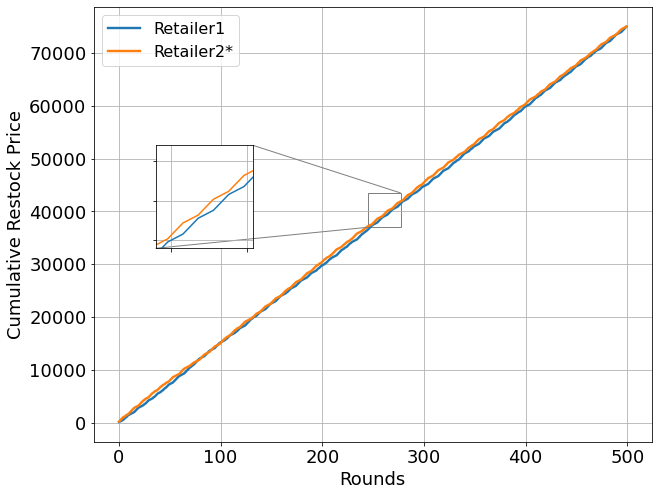

In [52]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load data from log.json
with open("/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2BLOCKS,500.MC.ST=0(NEW)/logs.json", "r") as file:
    logs = json.load(file)

# Extract relevant data
new_price_data = []
for entry in logs:
    if entry["event"] == "NewPrice":
        instance_id = entry["data"]["instanceID"]
        new_price = int(entry["data"]["newPrice"])
        round_number = entry["round"]  # Use the round number instead of timestamp
        new_price_data.append({"InstanceID": instance_id, "NewPrice": new_price, "Round": round_number})

# Convert to a DataFrame
df = pd.DataFrame(new_price_data)

# Combine instances 1 and 3, and 2 and 4
df["CombinedInstanceID"] = df["InstanceID"].replace({"1": "Retailer1", "2": "Retailer1", "3": "Retailer2*", "4": "Retailer2*"})

# Sort data by round
df.sort_values("Round", inplace=True)

# Accumulate NewPrice over time for each combined group
df["CumulativePrice"] = df.groupby("CombinedInstanceID")["NewPrice"].transform(pd.Series.cumsum)

# Add y-axis adjustments
adjustments = {"Retailer1": 0.4, "Retailer2*": -0.4}
df["AdjustedCumulativePrice"] = df["CumulativePrice"] + df["CombinedInstanceID"].map(adjustments)

plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size


# Plot the data with zooming feature
fig, ax = plt.subplots(figsize=(10, 8))
for combined_id, group in df.groupby("CombinedInstanceID"):
    ax.plot(group["Round"].values, group["AdjustedCumulativePrice"].values, label=f"{combined_id}", linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Restock Price")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
for combined_id, group in df.groupby("CombinedInstanceID"):
    axins.plot(group["Round"].values, group["AdjustedCumulativePrice"].values, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 245, 277  # Adjust these limits based on the rounds of interest
y1, y2 = 37000, 43500  # Adjust these limits based on the cumulative counts of interest

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

plt.savefig("accumulated_price_OC_2BLOCKS.pdf")

# Display the plot
plt.show()


OC,2Blocks,500,MC,ST=1

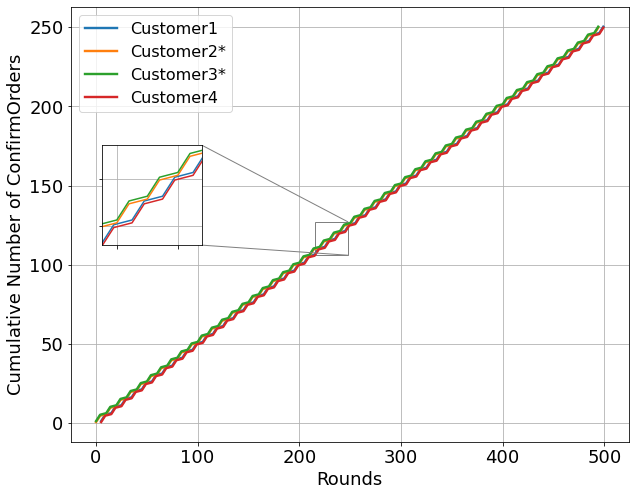

In [1]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2BLOCKS,500,MC,ST=2/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_customer1 = []
rounds_customer2 = []
rounds_customer3 = []
rounds_customer4 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        round_number = entry['round']  # Use the round information

        if receiver == "customer1":
            rounds_customer1.append(round_number)
        elif receiver == "customer2":
            rounds_customer2.append(round_number)
        elif receiver == "customer3":
            rounds_customer3.append(round_number)
        elif receiver == "customer4":
            rounds_customer4.append(round_number)

# Sort rounds
rounds_customer1.sort()
rounds_customer2.sort()
rounds_customer3.sort()
rounds_customer4.sort()

# Create line data for the plot
x_customer1 = sorted(set(rounds_customer1))
y_customer1 = [rounds_customer1.count(r) for r in x_customer1]

x_customer2 = sorted(set(rounds_customer2))
y_customer2 = [rounds_customer2.count(r) for r in x_customer2]

x_customer3 = sorted(set(rounds_customer3))
y_customer3 = [rounds_customer3.count(r) for r in x_customer3]

x_customer4 = sorted(set(rounds_customer4))
y_customer4 = [rounds_customer4.count(r) for r in x_customer4]

# Accumulate counts to show the cumulative count of ConfirmOrders
cumulative_y_customer1 = []
cumulative_y_customer2 = []
cumulative_y_customer3 = []
cumulative_y_customer4 = []

cumsum1 = 0
cumsum2 = 0
cumsum3 = 0
cumsum4 = 0

for y in y_customer1:
    cumsum1 += y
    cumulative_y_customer1.append(cumsum1)

for y in y_customer2:
    cumsum2 += y
    cumulative_y_customer2.append(cumsum2)

for y in y_customer3:
    cumsum3 += y
    cumulative_y_customer3.append(cumsum3)

for y in y_customer4:
    cumsum4 += y
    cumulative_y_customer4.append(cumsum4)

# Adjusting cumulative values for better visibility
cumulative_y_customer1 = [y + 0.3 for y in cumulative_y_customer1]
cumulative_y_customer2 = [y - 0.3 for y in cumulative_y_customer2]
cumulative_y_customer3 = [y + 0.3 for y in cumulative_y_customer3]
cumulative_y_customer4 = [y - 0.3 for y in cumulative_y_customer4]

# Plot the data with a zoomed-in view
plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_customer1, cumulative_y_customer1, label="Customer1", linestyle='-', linewidth=2.4)
ax.plot(x_customer2, cumulative_y_customer2, label="Customer2*", linestyle='-', linewidth=2.4)
ax.plot(x_customer3, cumulative_y_customer3, label="Customer3*", linestyle='-', linewidth=2.4)
ax.plot(x_customer4, cumulative_y_customer4, label="Customer4", linestyle='-', linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of ConfirmOrders")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.25, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_customer1, cumulative_y_customer1, linestyle='-', linewidth=1.5)
axins.plot(x_customer2, cumulative_y_customer2, linestyle='-', linewidth=1.5)
axins.plot(x_customer3, cumulative_y_customer3, linestyle='-', linewidth=1.5)
axins.plot(x_customer4, cumulative_y_customer4, linestyle='-', linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 215, 248  # Adjust these limits based on the rounds of interest
y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_purchases_OC_2BLOCKS.pdf", dpi=500)  # High resolution

# Display the plot
plt.show()


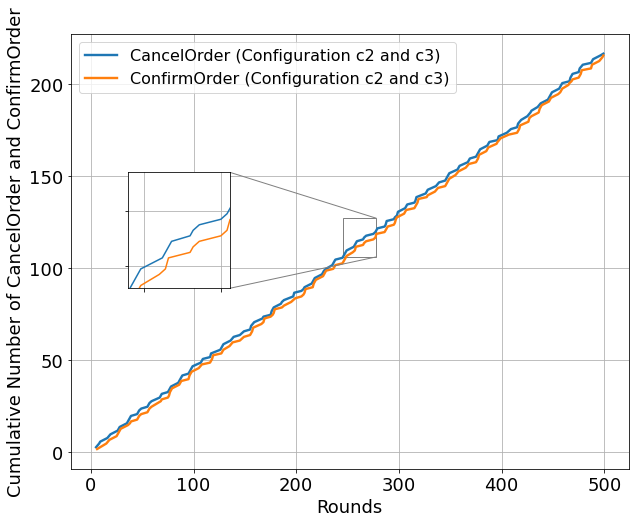

In [119]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2Blocks,500,MC,ST=2/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_cancelorder = []
rounds_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']  # Use the round information

        if instance_id in ["2","3"]:
            if entry['data']['taskName'] == "CancelOrder":
                rounds_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_confirmorder.append(round_number)

# Sort rounds
rounds_cancelorder.sort()
rounds_confirmorder.sort()

# Create line data for the plot
x_cancelorder = sorted(set(rounds_cancelorder))
y_cancelorder = [rounds_cancelorder.count(r) for r in x_cancelorder]

x_confirmorder = sorted(set(rounds_confirmorder))
y_confirmorder = [rounds_confirmorder.count(r) for r in x_confirmorder]

# Accumulate counts to show the cumulative count of CancelOrder and ConfirmOrder
cumulative_y_cancelorder = []
cumulative_y_confirmorder = []

cumsum_cancel = 0
cumsum_confirm = 0

for y in y_cancelorder:
    cumsum_cancel += y
    cumulative_y_cancelorder.append(cumsum_cancel)

for y in y_confirmorder:
    cumsum_confirm += y
    cumulative_y_confirmorder.append(cumsum_confirm)


cumulative_y_cancelorder = [y + 0.5 for y in cumulative_y_cancelorder]
cumulative_y_confirmorder = [y - 0.5 for y in cumulative_y_confirmorder]

plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size



# Plot the data with zooming feature
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_cancelorder, cumulative_y_cancelorder, label="CancelOrder (Configuration c2 and c3)", linewidth=2.4)
ax.plot(x_confirmorder, cumulative_y_confirmorder, label="ConfirmOrder (Configuration c2 and c3)",  linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of CancelOrder and ConfirmOrder")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_cancelorder, cumulative_y_cancelorder, linewidth=1.5)
axins.plot(x_confirmorder, cumulative_y_confirmorder, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 245, 278  # Adjust these limits based on the rounds of interest
y1, y2 = 106, 127  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_cancel_confirm_OC_2BLOCKS.pdf")

# Display the plot
plt.show()

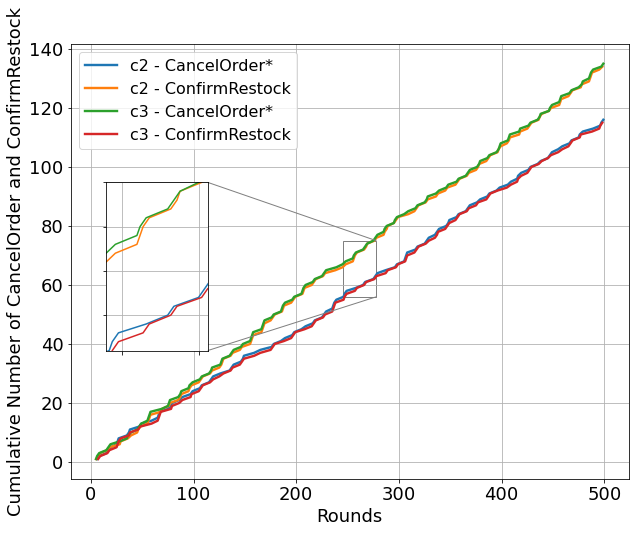

In [57]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2BLOCKS,500,MC,ST=2/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_c2_cancelorder = []
rounds_c2_confirmorder = []
rounds_c3_cancelorder = []
rounds_c3_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']

        if instance_id == "2":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c2_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c2_confirmorder.append(round_number)
        elif instance_id == "3":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c3_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c3_confirmorder.append(round_number)

# Sort rounds
rounds_c2_cancelorder.sort()
rounds_c2_confirmorder.sort()
rounds_c3_cancelorder.sort()
rounds_c3_confirmorder.sort()

# Function to generate cumulative data
def generate_cumulative_data(rounds):
    x = sorted(set(rounds))
    y = [rounds.count(r) for r in x]
    cumulative_y = []
    cumsum = 0
    for val in y:
        cumsum += val
        cumulative_y.append(cumsum)
    return x, cumulative_y

# Generate cumulative data
x_c2_cancelorder, cumulative_y_c2_cancelorder = generate_cumulative_data(rounds_c2_cancelorder)
x_c2_confirmorder, cumulative_y_c2_confirmorder = generate_cumulative_data(rounds_c2_confirmorder)
x_c3_cancelorder, cumulative_y_c3_cancelorder = generate_cumulative_data(rounds_c3_cancelorder)
x_c3_confirmorder, cumulative_y_c3_confirmorder = generate_cumulative_data(rounds_c3_confirmorder)

# Create the main plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_c2_cancelorder, cumulative_y_c2_cancelorder, label="c2 - CancelOrder*", linewidth=2.4)
ax.plot(x_c2_confirmorder, cumulative_y_c2_confirmorder, label="c2 - ConfirmRestock", linewidth=2.4)
ax.plot(x_c3_cancelorder, cumulative_y_c3_cancelorder, label="c3 - CancelOrder*", linewidth=2.4)
ax.plot(x_c3_confirmorder, cumulative_y_c3_confirmorder, label="c3 - ConfirmRestock", linewidth=2.4)

# Add labels, legend, and grid
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Number of CancelOrder and ConfirmRestock")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.26, 0.7), bbox_transform=ax.transAxes)
axins.plot(x_c2_cancelorder, cumulative_y_c2_cancelorder, linewidth=1.5)
axins.plot(x_c2_confirmorder, cumulative_y_c2_confirmorder, linewidth=1.5)
axins.plot(x_c3_cancelorder, cumulative_y_c3_cancelorder, linewidth=1.5)
axins.plot(x_c3_confirmorder, cumulative_y_c3_confirmorder, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 245, 278  # Adjust these limits based on the rounds of interest
y1, y2 = 56, 75  # Adjust these limits based on the cumulative counts of interest
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# Save the plot
plt.savefig("accumulated_cancel_confirm_OC_2BLOCKS.pdf")
plt.show()

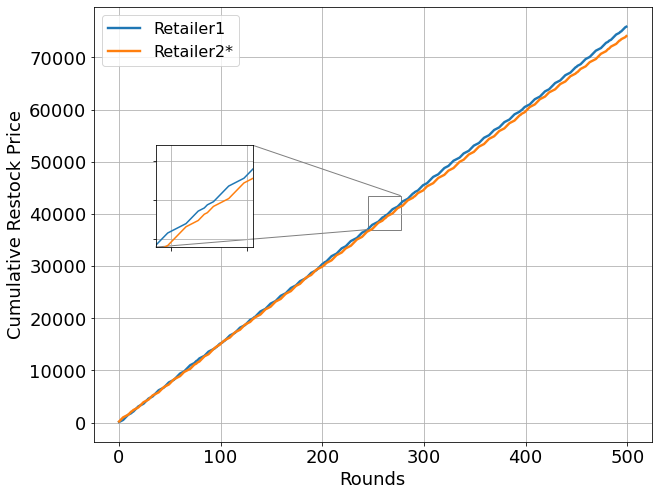

In [108]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load data from log.json
with open("/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2BLOCKS,500,MC,ST=2/logs.json", "r") as file:
    logs = json.load(file)

# Extract relevant data
new_price_data = []
for entry in logs:
    if entry["event"] == "NewPrice":
        instance_id = entry["data"]["instanceID"]
        new_price = int(entry["data"]["newPrice"])
        round_number = entry["round"]  # Use the round number instead of timestamp
        new_price_data.append({"InstanceID": instance_id, "NewPrice": new_price, "Round": round_number})

# Convert to a DataFrame
df = pd.DataFrame(new_price_data)

# Combine instances 1 and 3, and 2 and 4
df["CombinedInstanceID"] = df["InstanceID"].replace({"1": "Retailer1", "2": "Retailer1", "3": "Retailer2*", "4": "Retailer2*"})

# Sort data by round
df.sort_values("Round", inplace=True)

# Accumulate NewPrice over time for each combined group
df["CumulativePrice"] = df.groupby("CombinedInstanceID")["NewPrice"].transform(pd.Series.cumsum)

# Add y-axis adjustments
adjustments = {"Retailer1": 0.4, "Retailer2*": -0.4}
df["AdjustedCumulativePrice"] = df["CumulativePrice"] + df["CombinedInstanceID"].map(adjustments)

plt.rc('font', size=18)  # Global font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # Label font size
plt.rc('legend', fontsize=16)  # Legend font size


# Plot the data with zooming feature
fig, ax = plt.subplots(figsize=(10, 8))
for combined_id, group in df.groupby("CombinedInstanceID"):
    ax.plot(group["Round"].values, group["AdjustedCumulativePrice"].values, label=f"{combined_id}", linewidth=2.4)

# Add labels, legend, and title
ax.set_xlabel("Rounds")
ax.set_ylabel("Cumulative Restock Price")
ax.legend()
ax.grid()

# Zoomed-in inset
axins = zoomed_inset_axes(ax, zoom=3, bbox_to_anchor=(0.3, 0.7), bbox_transform=ax.transAxes)
for combined_id, group in df.groupby("CombinedInstanceID"):
    axins.plot(group["Round"].values, group["AdjustedCumulativePrice"].values, linewidth=1.5)

# Define the zoomed-in area
x1, x2 = 245, 277  # Adjust these limits based on the rounds of interest
y1, y2 = 37000, 43500  # Adjust these limits based on the cumulative counts of interest

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and remove ticks for the zoomed-in inset
axins.grid()
plt.xticks(visible=False)
plt.yticks(visible=False)

# Mark the inset area on the main plot
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

plt.savefig("accumulated_price_OC_2BLOCKS.pdf")

# Display the plot
plt.show()


DURATION and GAS

In [10]:
import json

# Load the JSON data from the file
with open("/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,5BLOCKS,500,MC,ST=2/roundMetrics.json", "r") as file:
    round_metrics = json.load(file)

# Initialize variables to compute total duration, total gas usage, and count of rounds
total_duration = 0
total_gas_usage = 0
round_count = 0

# Iterate through the rounds to compute the total duration, total gas usage, and count
for round_id, metrics in round_metrics.items():
    # Add duration
    total_duration += metrics["duration"]
    
    # Add gas usage for the current round
    round_gas_usage = sum(int(gas["gasUsed"]) for gas in metrics["gasUsage"])
    total_gas_usage += round_gas_usage
    
    # Increment the round count
    round_count += 1

# Compute the averages
average_duration = total_duration / round_count if round_count > 0 else 0
average_gas_usage = total_gas_usage / round_count if round_count > 0 else 0

# Print the results
print(f"Average Duration per Round: {average_duration:.2f} ms")
print(f"Average Gas Usage per Round: {average_gas_usage:.2f} gas")


Average Duration per Round: 33803.70 ms
Average Gas Usage per Round: 12379731.61 gas


In [22]:
import json

# Load the data from externalOrderers.json
with open("/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/OC,2Blocks,500,MC,ST=2/externalOrderers.json", "r") as file:
    data = json.load(file)

# Set the total number of entries to 7
TOTAL_ENTRIES = 7

# Function to count unique addresses in each entry
def count_unique_addresses(data):
    unique_counts = []
    all_addresses = set()
    
    for entry in data:
        unique_addresses = set()
        for sublist in entry:
            address = sublist[0]  # Extract the address
            unique_addresses.add(address)
            all_addresses.add(address)
        unique_counts.append(len(unique_addresses) / TOTAL_ENTRIES)  # Normalize count per 7 entries
    
    return unique_counts, all_addresses

# Compute unique counts per entry and total unique addresses
unique_counts, all_addresses = count_unique_addresses(data)

# Compute overall average
overall_avg = sum(unique_counts) / len(data) if data else 0

# Print results
print("Average unique addresses per entry (out of 7):", unique_counts)
print("Overall average of unique addresses:", overall_avg)

Average unique addresses per entry (out of 7): [0.14285714285714285, 0.42857142857142855, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.42857142857142855, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.42857142857142855, 0.42857142857142855, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.42857142

Mean ABS

In [53]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/PLAIN,5BLOCKS,500,MC/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_customer1 = []
rounds_customer2 = []
rounds_customer3 = []
rounds_customer4 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        round_number = entry['round']

        if receiver == "customer1":
            rounds_customer1.append(round_number)
        elif receiver == "customer2":
            rounds_customer2.append(round_number)
        elif receiver == "customer3":
            rounds_customer3.append(round_number)
        elif receiver == "customer4":
            rounds_customer4.append(round_number)

# Sort rounds
rounds_customer1.sort()
rounds_customer2.sort()
rounds_customer3.sort()
rounds_customer4.sort()

# Function to generate cumulative data
def generate_cumulative_data(rounds):
    x = sorted(set(rounds))
    y = [rounds.count(r) for r in x]
    cumulative_y = np.cumsum(y)
    return x, cumulative_y

# Generate cumulative data
x_customer1, cumulative_y_customer1 = generate_cumulative_data(rounds_customer1)
x_customer2, cumulative_y_customer2 = generate_cumulative_data(rounds_customer2)
x_customer3, cumulative_y_customer3 = generate_cumulative_data(rounds_customer3)
x_customer4, cumulative_y_customer4 = generate_cumulative_data(rounds_customer4)

# Find common x-values for interpolation
all_rounds_12 = sorted(set(x_customer1 + x_customer2))
all_rounds_34 = sorted(set(x_customer3 + x_customer4))

# Interpolate function
def interpolate_data(x_values, y_values, common_x):
    if len(x_values) > 1:
        f = interp1d(x_values, y_values, kind='linear', fill_value="extrapolate")
        return f(common_x)
    else:
        return np.zeros(len(common_x))

# Interpolate cumulative data
y_customer1_interp = interpolate_data(x_customer1, cumulative_y_customer1, all_rounds_12)
y_customer2_interp = interpolate_data(x_customer2, cumulative_y_customer2, all_rounds_12)
y_customer3_interp = interpolate_data(x_customer3, cumulative_y_customer3, all_rounds_34)
y_customer4_interp = interpolate_data(x_customer4, cumulative_y_customer4, all_rounds_34)

# Compute absolute differences
abs_diff_12 = np.abs(y_customer1_interp - y_customer2_interp)
abs_diff_34 = np.abs(y_customer3_interp - y_customer4_interp)

# Compute total and mean absolute differences
total_abs_diff_12 = np.sum(abs_diff_12)
total_abs_diff_34 = np.sum(abs_diff_34)
mean_abs_diff_12 = np.mean(abs_diff_12)
mean_abs_diff_34 = np.mean(abs_diff_34)

# Print the total and mean absolute differences
print(f"Total Absolute Difference (Customer1 vs Customer2): {total_abs_diff_12}")
print(f"Total Absolute Difference (Customer3 vs Customer4): {total_abs_diff_34}")
print(f"Mean Absolute Difference (Customer1 vs Customer2): {mean_abs_diff_12}")
print(f"Mean Absolute Difference (Customer3 vs Customer4): {mean_abs_diff_34}")

Total Absolute Difference (Customer1 vs Customer2): 27684.5
Total Absolute Difference (Customer3 vs Customer4): 17278.566666666666
Mean Absolute Difference (Customer1 vs Customer2): 55.369
Mean Absolute Difference (Customer3 vs Customer4): 34.55713333333333


Total Absolute Difference (Retailer1 vs Retailer2): 1119400.00
Mean Absolute Difference (Retailer1 vs Retailer2): 2238.80
Mean Absolute Percentage Error (MAPE): 6.59%
Normalized Mean Absolute Difference (NMAD): 0.02934


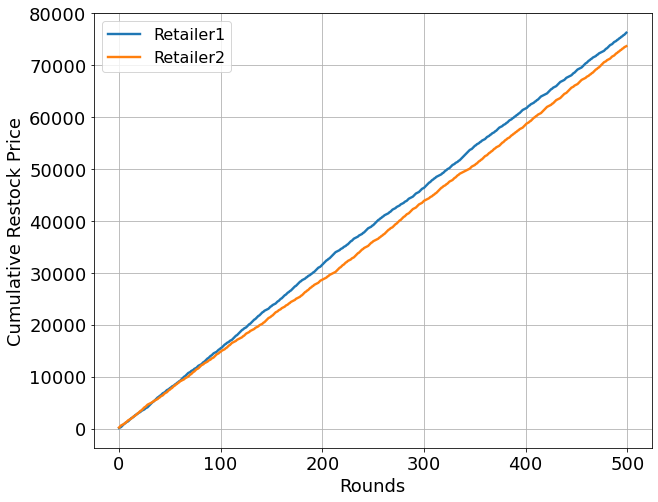

In [54]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load data from log.json
with open("/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/PLAIN,5BLOCKS,500,MC/logs.json", "r") as file:
    logs = json.load(file)

# Extract relevant data
new_price_data = []
for entry in logs:
    if entry["event"] == "NewPrice":
        instance_id = entry["data"]["instanceID"]
        new_price = float(entry["data"]["newPrice"])
        round_number = entry["round"]  # Use the round number instead of timestamp
        new_price_data.append({"InstanceID": instance_id, "NewPrice": new_price, "Round": round_number})

# Convert to a DataFrame
df = pd.DataFrame(new_price_data)

# Combine instances 1 and 2 as Retailer1, and 3 and 4 as Retailer2
df["CombinedInstanceID"] = df["InstanceID"].replace({"1": "Retailer1", "2": "Retailer1", "3": "Retailer2", "4": "Retailer2"})

# Sort data by round
df.sort_values("Round", inplace=True)

# Compute cumulative sum per retailer
df["CumulativePrice"] = df.groupby("CombinedInstanceID")["NewPrice"].cumsum()

# Align data points for both retailers
all_rounds = sorted(df["Round"].unique())
def interpolate_prices(instance):
    sub_df = df[df["CombinedInstanceID"] == instance]
    f = interp1d(sub_df["Round"], sub_df["CumulativePrice"], kind='linear', fill_value='extrapolate', bounds_error=False)
    return f(all_rounds)

# Interpolated cumulative prices
y_retailer1_interp = interpolate_prices("Retailer1")
y_retailer2_interp = interpolate_prices("Retailer2")

# Compute absolute differences
abs_diff_retailers = np.abs(y_retailer1_interp - y_retailer2_interp)

# Compute total and mean absolute differences
total_abs_diff_retailers = np.sum(abs_diff_retailers)
mean_abs_diff_retailers = np.mean(abs_diff_retailers)

# Compute Mean Absolute Percentage Error (MAPE)
mape = np.mean((abs_diff_retailers / ((y_retailer1_interp + y_retailer2_interp) / 2)) * 100)

# Compute Normalized Mean Absolute Difference (NMAD)
nmad = mean_abs_diff_retailers / max(np.max(y_retailer1_interp), np.max(y_retailer2_interp))

# Print the standardized difference metrics
print(f"Total Absolute Difference (Retailer1 vs Retailer2): {total_abs_diff_retailers:.2f}")
print(f"Mean Absolute Difference (Retailer1 vs Retailer2): {mean_abs_diff_retailers:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Normalized Mean Absolute Difference (NMAD): {nmad:.5f}")

# Plot the data
plt.figure(figsize=(10, 8))
plt.plot(all_rounds, y_retailer1_interp, label="Retailer1", linewidth=2.4)
plt.plot(all_rounds, y_retailer2_interp, label="Retailer2", linewidth=2.4)
plt.xlabel("Rounds")
plt.ylabel("Cumulative Restock Price")
plt.legend()
plt.grid()
plt.savefig("accumulated_price_OC_2BLOCKS.pdf")
plt.show()


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the JSON data from a file
with open('/mnt/c/Users/atwih/My Documents/GitHub/transparent-ordering/data/results/PLAIN,5BLOCKS,500,MC/logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_c2_cancelorder = []
rounds_c2_confirmorder = []
rounds_c3_cancelorder = []
rounds_c3_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']

        if instance_id == "2":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c2_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c2_confirmorder.append(round_number)
        elif instance_id == "3":
            if entry['data']['taskName'] == "CancelOrder":
                rounds_c3_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_c3_confirmorder.append(round_number)

# Sort rounds
rounds_c2_cancelorder.sort()
rounds_c2_confirmorder.sort()
rounds_c3_cancelorder.sort()
rounds_c3_confirmorder.sort()

# Function to generate cumulative data
def generate_cumulative_data(rounds):
    x = sorted(set(rounds))
    y = [rounds.count(r) for r in x]
    cumulative_y = []
    cumsum = 0
    for val in y:
        cumsum += val
        cumulative_y.append(cumsum)
    return x, cumulative_y

# Generate cumulative data
x_c2_cancelorder, cumulative_y_c2_cancelorder = generate_cumulative_data(rounds_c2_cancelorder)
x_c2_confirmorder, cumulative_y_c2_confirmorder = generate_cumulative_data(rounds_c2_confirmorder)
x_c3_cancelorder, cumulative_y_c3_cancelorder = generate_cumulative_data(rounds_c3_cancelorder)
x_c3_confirmorder, cumulative_y_c3_confirmorder = generate_cumulative_data(rounds_c3_confirmorder)

# Find common x-values for interpolation
all_rounds_c2 = sorted(set(x_c2_cancelorder + x_c2_confirmorder))
all_rounds_c3 = sorted(set(x_c3_cancelorder + x_c3_confirmorder))

# Interpolate function
def interpolate_data(x_values, y_values, common_x):
    if len(x_values) > 1:
        f = interp1d(x_values, y_values, kind='linear', fill_value="extrapolate")
        return f(common_x)
    else:
        return np.zeros(len(common_x))  # Handle cases where there's insufficient data

# Interpolate cumulative data
y_c2_cancel_interp = interpolate_data(x_c2_cancelorder, cumulative_y_c2_cancelorder, all_rounds_c2)
y_c2_confirm_interp = interpolate_data(x_c2_confirmorder, cumulative_y_c2_confirmorder, all_rounds_c2)
y_c3_cancel_interp = interpolate_data(x_c3_cancelorder, cumulative_y_c3_cancelorder, all_rounds_c3)
y_c3_confirm_interp = interpolate_data(x_c3_confirmorder, cumulative_y_c3_confirmorder, all_rounds_c3)

# Compute absolute differences
abs_diff_c2 = np.abs(y_c2_cancel_interp - y_c2_confirm_interp)
abs_diff_c3 = np.abs(y_c3_cancel_interp - y_c3_confirm_interp)

# Compute total and mean absolute differences
total_abs_diff_c2 = np.sum(abs_diff_c2)
total_abs_diff_c3 = np.sum(abs_diff_c3)
mean_abs_diff_c2 = np.mean(abs_diff_c2)
mean_abs_diff_c3 = np.mean(abs_diff_c3)

# Print the total and mean absolute differences
print(f"Total Absolute Difference (C2 Cancel vs Confirm): {total_abs_diff_c2}")
print(f"Total Absolute Difference (C3 Cancel vs Confirm): {total_abs_diff_c3}")
print(f"Mean Absolute Difference (C2 Cancel vs Confirm): {mean_abs_diff_c2}")
print(f"Mean Absolute Difference (C3 Cancel vs Confirm): {mean_abs_diff_c3}")

Total Absolute Difference (C2 Cancel vs Confirm): 8721.122531931433
Total Absolute Difference (C3 Cancel vs Confirm): 1866.172089022089
Mean Absolute Difference (C2 Cancel vs Confirm): 44.495523122099144
Mean Absolute Difference (C3 Cancel vs Confirm): 8.720430322533126


In [ ]:
Mean Absolute Difference (C2 Cancel vs Confirm): 0.5028571428571429
Mean Absolute Difference (C3 Cancel vs Confirm): 0.5028571428571429
0, 5
Mean Absolute Difference (C2 Cancel vs Confirm): 3.1632091764444703
Mean Absolute Difference (C3 Cancel vs Confirm): 2.6951219076219073
0, 2

In [ ]:
Mean Absolute Difference (C2 Cancel vs Confirm): 1.2749285714285716
Mean Absolute Difference (C3 Cancel vs Confirm): 0.7477142857142857
1, 5
Mean Absolute Difference (C2 Cancel vs Confirm): 5.69043591392989
Mean Absolute Difference (C3 Cancel vs Confirm): 5.718992063492063
1, 2

In [ ]:
Mean Absolute Difference (C2 Cancel vs Confirm): 0.5015238095238095
Mean Absolute Difference (C3 Cancel vs Confirm): 0.5042073054121248
2, 5
-
-
2, 2